In [26]:
%matplotlib notebook

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
import json
import os
import time
import glob

class FreehandPolygonDemo:
    def __init__(self, directory_path):
        self.directory_path = directory_path
        self.image_files = sorted(glob.glob(os.path.join(directory_path, '*.jpg')))  # List all jpg files
        self.current_image_index = 0
        self.image = None
        self.fig, self.ax = None, None
        self.polygon = []  # Store current points
        self.polygons = {}  # Dictionary to store all polygons
        self.clear_count = 0  # Initialize clear count
        self.timestamps = {
            "first_click": None,
            "save_clicked": None
        }
        self.load_image()  # Load the first image automatically

    def load_image(self):
        """Load an image from a file and display it."""
        if self.image_files:
            image_path = self.image_files[self.current_image_index]
            self.image = plt.imread(image_path)
            self.show_image()
        else:
            print("No images found in the directory.")

    def show_image(self):
        """Show the image with interactive polygon drawing capabilities."""
        if self.image is not None:
            clear_output(wait=True)  # Clear previous outputs
            self.fig, self.ax = plt.subplots()
            self.ax.imshow(self.image)
            self.ax.axis('off')

            # Get the filename from the path and set it as the title of the plot
            filename = os.path.basename(self.image_files[self.current_image_index])
            self.ax.set_title(filename)  # Set the image filename as the title

            self.fig.canvas.mpl_connect('button_press_event', self.on_press)
            self.add_buttons()  # Add navigation and action buttons
        else:
            print("No image loaded.")

    def on_press(self, event):
        """Handle mouse button press events."""
        if event.inaxes != self.ax:
            return  # Ignore clicks outside the axes

        # Initialize timestamps and clear count for a new polygon
        if not self.polygon:  # Check if starting a new polygon
            self.timestamps = {
                "first_click": time.time(),
                "save_clicked": None
            }
            #self.clear_count = 0

        # Add the click position to the polygon points
        self.polygon.append((event.xdata, event.ydata))
        
        # Update the drawing
        if len(self.polygon) > 1:
            x, y = zip(*self.polygon)
            self.ax.plot(x, y, marker='o', linestyle='-', color='blue', markersize=4)
            #self.ax.fill(x, y, color='red', alpha=0.3)
            #self.polygon.append(self.polygon[0])  # Close the polygon
            self.fig.canvas.draw()

    def add_buttons(self):
        """Add navigation and action buttons below the figure."""
        previous_button = widgets.Button(description="Previous")
        next_button = widgets.Button(description="Next")
        save_button = widgets.Button(description="Save")
        clear_button = widgets.Button(description="Clear")
        end_button = widgets.Button(description="End")
        previous_button.on_click(self.on_previous_clicked)
        next_button.on_click(self.on_next_clicked)
        save_button.on_click(self.on_save_clicked)
        clear_button.on_click(self.on_clear_clicked)
        end_button.on_click(self.on_end_clicked)
        button_box = widgets.HBox([previous_button, next_button, save_button, clear_button, end_button])
        display(button_box)

    def on_previous_clicked(self, b):
        """Go to the previous image."""
        if self.current_image_index > 0:
            self.current_image_index -= 1
            self.load_image()

    def on_next_clicked(self, b):
        """Go to the next image."""
        self.clear_count = 0
        if self.current_image_index < len(self.image_files) - 1:
            self.current_image_index += 1
            self.load_image()

    def on_save_clicked(self, b):
        """Handle Save button click: save polygon data for current image."""
        if self.polygon:
            filename = os.path.basename(self.image_files[self.current_image_index])
            if filename not in self.polygons:
                self.polygons[filename] = []
            self.timestamps["save_clicked"] = time.time()
            polygon_data = {
                "polygon": list(self.polygon),
                "timestamps": self.timestamps,
                "clear_count": self.clear_count
            }
            self.polygons[filename].append(polygon_data)
            self.polygon = []  # Reset the current polygon
            print(f"Polygon data saved for {filename}. Total entries: {len(self.polygons[filename])}")

    def on_clear_clicked(self, b):
        """Clear the drawing, reset polygon data, and increment clear count."""
        self.clear_count += 1  # Increment clear count
        self.polygon = []
        self.ax.clear()
        self.ax.imshow(self.image)
        self.ax.axis('off')
        self.fig.canvas.draw()
        print(f"Clear button clicked {self.clear_count} times.")  # Diagnostic message

    def on_end_clicked(self, b):
        """Save all polygon data to a JSON file when ending the session."""
        file_path = "all_polygon_data.json"
        with open(file_path, 'w') as f:
            json.dump(self.polygons, f, indent=4)
        print(f"All polygon data saved to {file_path}. Session ended.")

# Usage example
#demo = FreehandPolygonDemo("Images")  # Make sure the path is correct


<IPython.core.display.Javascript object>


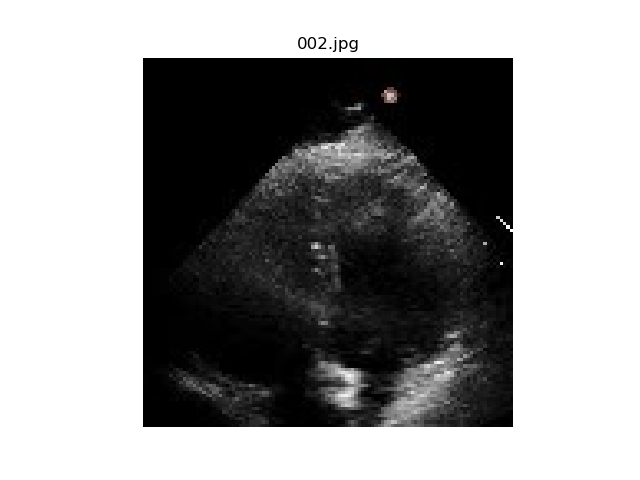

Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x0000015BDC85A7A0>
Traceback (most recent call last):
  File "C:\Users\m133326\AppData\Local\anaconda3\lib\weakref.py", line 58, in _cb
    if self._alive:
AttributeError: 'NoneType' object has no attribute '_alive'


In [93]:
# Usage example
demo = FreehandPolygonDemo("Annotation Study")  # Make sure the path is correct

In [92]:
import os
import pandas as pd
import shutil
import random

def main():
    # Set a random seed for reproducibility
    random_seed = 42
    random.seed(random_seed)

    source_dir = r'C:\Users\m133326\Desktop\AI projects\SAM\EchoNet-Images\TEST'
    target_dir = r'C:\Users\m133326\Desktop\AI projects\SAM\Annotation Study'
    os.makedirs(target_dir, exist_ok=True)  # Create target directory if it doesn't exist

    # List all images in the source directory
    all_files = [f for f in os.listdir(source_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
    # Randomly select 100 images
    selected_files = random.sample(all_files, 100)

    # Dictionary to keep track of mapping
    mapping = {}

    # Rename and move files
    for idx, filename in enumerate(selected_files, 1):
        new_filename = f'{idx:03}.jpg'  # Format numbers as 001, 002, ..., 100
        shutil.copy(os.path.join(source_dir, filename), os.path.join(target_dir, new_filename))
        mapping[new_filename] = filename

    # Create a DataFrame to store the mapping
    df = pd.DataFrame(list(mapping.items()), columns=['New Filename', 'Original Filename'])
    
    # Save the DataFrame to an Excel file
    df.to_excel(r'C:\Users\m133326\Desktop\AI projects\SAM\Annotation Study\filename_mapping.xlsx', index=False)

    print("Images have been processed and mapping saved.")

if __name__ == "__main__":
    main()


Images have been processed and mapping saved.


In [72]:
import json

def load_json_data(file_path):
    """Load JSON data from a file."""
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
            print("Data loaded successfully!")
            return data
    except FileNotFoundError:
        print("File not found.")
        return None
    except json.JSONDecodeError:
        print("Error decoding JSON.")
        return None

# Usage example
file_path = r'C:\Users\m133326\Desktop\AI projects\SAM\all_polygon_data.json'
polygon_data = load_json_data(file_path)

# Optionally, print the loaded data or inspect part of it
if polygon_data is not None:
    print(json.dumps(polygon_data, indent=4))  # Print the data formatted nicely


Data loaded successfully!
{
    "001.jpg": [
        {
            "polygon": [
                [
                    38.823863636363654,
                    90.5776515151515
                ],
                [
                    33.97537878787881,
                    75.72916666666666
                ],
                [
                    30.94507575757578,
                    63.304924242424235
                ],
                [
                    27.914772727272748,
                    50.27462121212119
                ],
                [
                    31.551136363636388,
                    39.66856060606058
                ],
                [
                    38.52083333333336,
                    37.85037878787877
                ],
                [
                    48.52083333333336,
                    38.153409090909065
                ],
                [
                    57.91477272727275,
                    43.60795454545453
                ],
    

In [78]:
polygon_data["001.jpg"][0]['timestamps']

{'first_click': 1721489823.0439794, 'save_clicked': 1721489833.0993583}

In [86]:
import json
import statistics

def calculate_timestamp_differences(polygon_data):
    """Calculate the time differences across all polygons and compute overall statistics."""
    all_time_diffs = []  # List to store all time differences across all files

    for filename, polygons in polygon_data.items():
        for polygon in polygons:
            timestamps = polygon['timestamps']
            if 'save_clicked' in timestamps and 'first_click' in timestamps:
                time_diff = timestamps['save_clicked'] - timestamps['first_click']
                all_time_diffs.append(time_diff)
            else:
                print(f"Timestamps missing for polygon in {filename}")

    # Calculate overall statistics for the group of all polygons
    if all_time_diffs:
        mean_time_diff = statistics.mean(all_time_diffs)
        std_time_diff = statistics.stdev(all_time_diffs) if len(all_time_diffs) > 1 else 0
    else:
        mean_time_diff = std_time_diff = 0

    return all_time_diffs, mean_time_diff, std_time_diff

In [88]:
if polygon_data:
    time_diffs, overall_mean, overall_std = calculate_timestamp_differences(polygon_data)
    #print(f"All Time Differences: {time_diffs}")
    print(f"Overall Mean Time Difference: {overall_mean:.2f} s")
    print(f"Overall Standard Deviation: {overall_std:.2f} s")

Overall Mean Time Difference: 9.36 s
Overall Standard Deviation: 2.42 s
